### 1. 

En el archivo "logistic_regression_df_class" hemos visto un ejemplo multiclase. Realiza un análisis con regresión linear multinominal teniendo como target la columna "duración". Es decir, averigua cuánto aumentan o disminuyen la duración cuando se aumenta una unidad los valores de las demás columnas.

- ¿Qué acierto tiene? (score)
- ¿Cuál es el RMSE? ¿Dirías que es un valor alto?
- Viendo la matriz de correlación, ¿tienen coherencia los resultados de la regresión?
- ¿Es la regresión un buen método para este dataset?

In [26]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
dataframe = pd.read_csv("../data/usuarios_win_mac_lin.csv")

In [6]:
dataframe

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2
...,...,...,...,...,...
165,13.0,1,7,42,0
166,12.0,1,2,6,0
167,13.0,1,3,9,0
168,13.0,1,7,28,0


<AxesSubplot:>

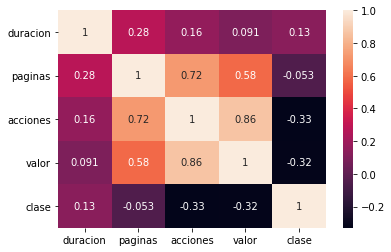

In [27]:
sns.heatmap(dataframe.corr(), annot=True)

In [7]:
dataframe.drop(['duracion'], 1) # la variable duracion es el target por eso no lo pongo

,paginas,acciones,valor,clase
0,2,4,8,2
1,2,6,6,2
2,2,4,4,2
3,3,6,12,2
4,2,6,12,2
...,...,...,...,...
165,1,7,42,0
166,1,2,6,0
167,1,3,9,0
168,1,7,28,0


In [8]:
X = np.array(dataframe.drop(['duracion'], axis=1))
y = np.array(dataframe['duracion'])
print(y.shape)
X.shape

(170,)


(170, 4)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [10]:
from sklearn.linear_model import LinearRegression


In [12]:
lm = LinearRegression(n_jobs=-1)
lm.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [13]:
lm.intercept_

2.81270986035787

In [14]:
lm.coef_

array([56.74966999, -1.43283941, -0.49629566, 32.02178994])

In [16]:
lm.score(X_train, y_train) *100

11.822945926275086

In [17]:
lm.score(X_test, y_test) *100

0.6761052940610912

In [18]:
predictions = lm.predict(X_test)

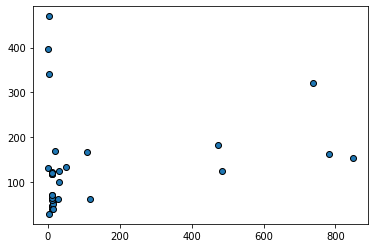

In [19]:
plt.scatter(y_test, predictions, edgecolor='black')

In [20]:
from sklearn import metrics

In [21]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 158.38316344920452
MSE: 55992.83722550592
RMSE: 236.62805671666646


In [22]:
lm.score(X_train, y_train) * 100 # Entrenamiento

11.822945926275086

In [23]:
lm.score(X_test, y_test) * 100  # Test

0.6761052940610912

In [24]:
lm.score(X, y) * 100  # Test

8.749468479299537

### El acierto o score del modelo al aplicar una regresión lineal es muy bajo. Corresponde a un 8.75% en general. Un score de 11,82%  en entrenamiento y 0.67% en test.
### El RMSE es un valor muy alto (236.62), el cual contrastando con la matriz de correlacion, se puede decir que tiene coherencia entre ambos resultados, ya que se muestra que existe una correlacion muy baja entre la variable dependiente y la independente. 
### Es por esto que se concluye que la regresión no es un buen método para este dataset. 
